In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime


In [2]:
data = pd.read_csv(r"C:\Users\bhumi\OneDrive\Desktop\Time-Series-Forecasting-of-Temperature\Temperature_And_Precipitation_Cities_IN\Bangalore_1990_2022_BangaloreCity.csv", index_col=0)
data

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5
22-07-2022,23.2,21.1,27.9,0.0
23-07-2022,23.1,20.9,26.7,0.0


In [3]:
data.shape

(11894, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    11824 non-null  float64
 1   tmin    10505 non-null  float64
 2   tmax    11265 non-null  float64
 3   prcp    7274 non-null   float64
dtypes: float64(4)
memory usage: 464.6+ KB


In [5]:
data.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [6]:
data.head()

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0


In [7]:
data = data.drop(['tmin', 'tmax', 'prcp'], axis = 1)
data

,tavg
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [8]:
data = data.rename(columns={"tavg" : "Temperature"})
data

,Temperature
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [99]:
# Assuming 'data' is your DataFrame containing the temperature data
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
data = data[data.index.year < 2021]

In [100]:
data.isnull().sum()

Temperature    0
dtype: int64

In [ ]:
#data = data.ffill(axis = 1)
#data

In [101]:
# Check for infinite values and replace them with NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean of the column
imputer = SimpleImputer(strategy='mean')
data['Temperature'] = imputer.fit_transform(data[['Temperature']])

# Now, you can proceed with the ADF test
result = sm.tsa.adfuller(data['Temperature'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -10.31955255825971
p-value: 3.0341952420148988e-18


In [102]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

print('Results of Dickey Fuller Test:')
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(data['Temperature'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: -10.31955255825971
p-value: 3.0341952420148988e-18
Critical Values:
   1%: -3.430929754341502
   5%: -2.861796220138508
   10%: -2.566906380870473


Results of Dickey Fuller Test:
ADF Statistic: -10.628674384876106
p-value: 5.2833544149151335e-19
Critical Values:
   1%: -3.430901819518007
   5%: -2.8617838756006195
   10%: -2.566899809920393

The test showed that the ADF statistic is -10.63, and the p-value is very close to zero. The ADF statistic helps us know if a time series is stationary. Since our ADF statistic is way lower than the critical values at 1%, 5%, and 10% significance levels, and our p-value is extremely small, we can say our time series is probably stationary.

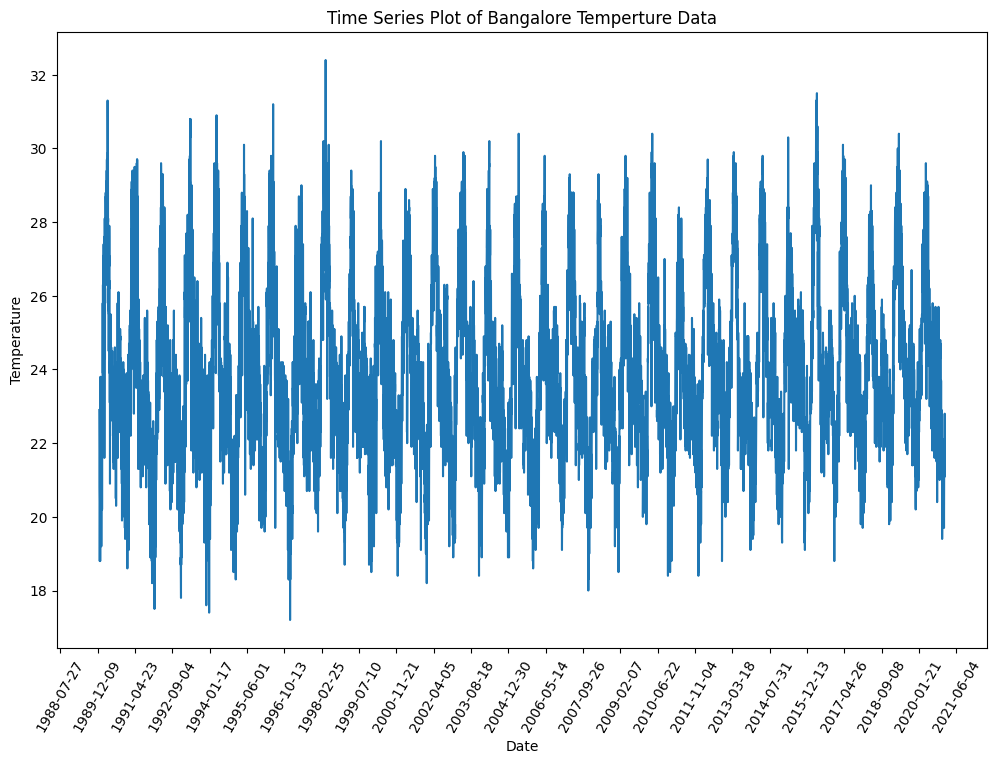

In [103]:
# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the time series using a line plot
sns.lineplot(x=data.index, y='Temperature', data=data)

# Add titles and labels
plt.title('Time Series Plot of Bangalore Temperture Data')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Customize x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))  # Adjust the interval as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

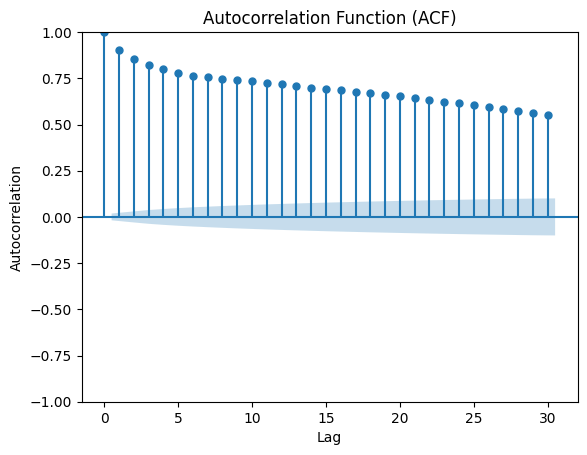

<Figure size 1200x800 with 0 Axes>

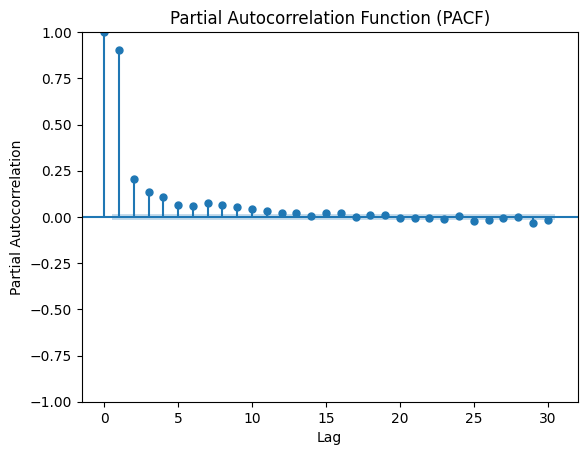

In [104]:
# Plot ACF
plt.figure(figsize=(12, 8))
sm.graphics.tsa.plot_acf(data, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 8))
sm.graphics.tsa.plot_pacf(data, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

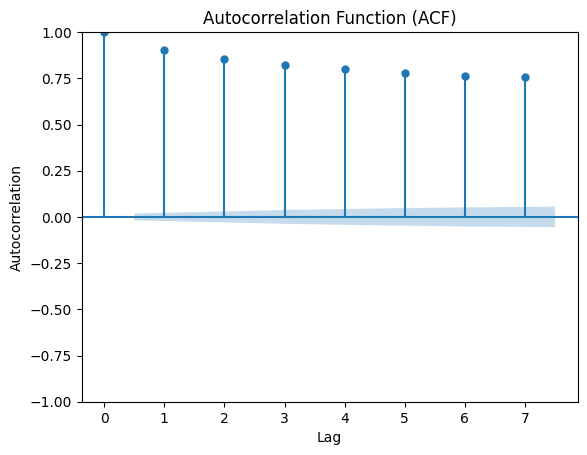

<Figure size 1200x600 with 0 Axes>

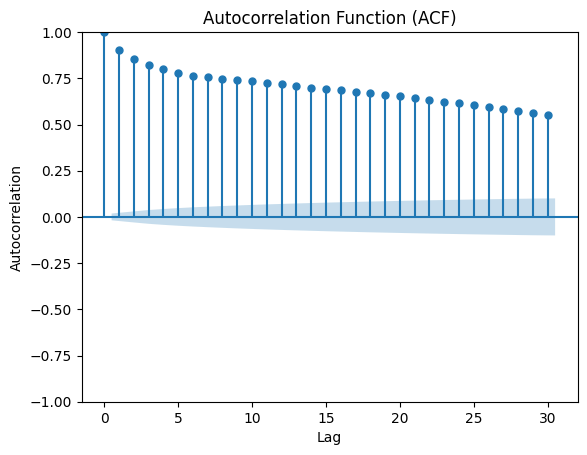

In [105]:
# Plot ACF to detect seasonality (7 days)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data, lags=7)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot ACF to detect seasonality (30 days)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Based on the autocorrelation plot, there are no significant peaks at any lag, indicating the absence of seasonality in the dataset.

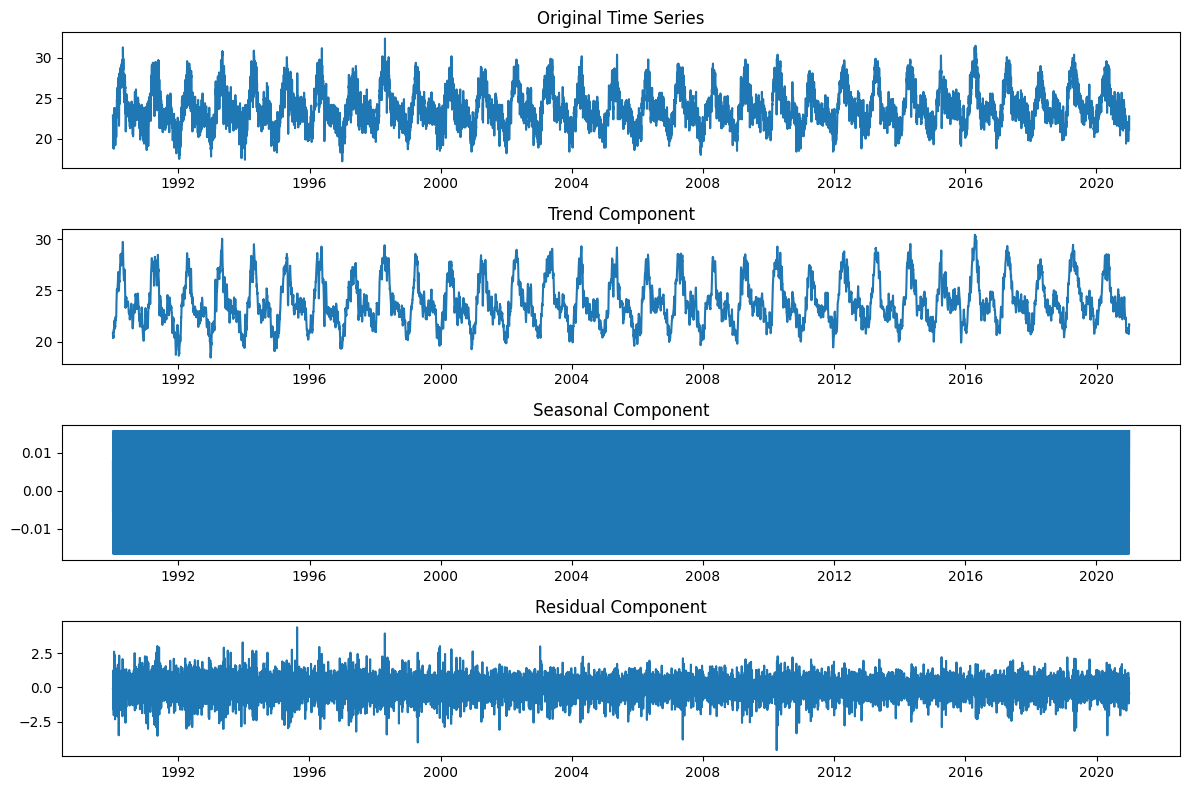

In [106]:
data.index = pd.date_range(start='1990-01-01', periods=len(data), freq='D')


# Decompose the time series using Classical Decomposition
classical_decomposition = sm.tsa.seasonal_decompose(data['Temperature'], model='additive')

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Temperature'])
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(classical_decomposition.trend)
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(classical_decomposition.seasonal)
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(classical_decomposition.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [107]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [108]:
stepwise_fit = auto_arima(data['Temperature'], trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30989.403, Time=5.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32591.643, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31894.802, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31551.452, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32589.644, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30987.452, Time=2.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31206.660, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30994.038, Time=1.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=30989.400, Time=2.69 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=31059.817, Time=1.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30987.575, Time=1.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=30991.258, Time=2.52 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=30985.452, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=31204.660, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0

In [109]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11323
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -15488.726
Date:                Fri, 03 May 2024   AIC                          30985.452
Time:                        00:30:14   BIC                          31014.790
Sample:                    01-01-1990   HQIC                         30995.322
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5647      0.025     22.785      0.000       0.516       0.613
ma.L1         -0.9147      0.026    -34.991      0.000      -0.966      -0.863
ma.L2          0.0536      0.017      3.243      0.001       0.021       0.086
sigma2         0.9031      0.009    100.157      0.000       0.885       0.921
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1545.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
from statsmodels.tsa.arima_model import ARIMA

In [111]:
data.shape

(11323, 1)

In [161]:
train = data.iloc[:-30]
test = data.iloc[-30:]
train.shape, test.shape

((11293, 1), (30, 1))

In [162]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is your DataFrame containing the temperature data
model = ARIMA(train['Temperature'], order=(1,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                11293
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -15455.876
Date:                Fri, 03 May 2024   AIC                          30919.752
Time:                        00:49:20   BIC                          30949.080
Sample:                    01-01-1990   HQIC                         30929.620
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5652      0.025     22.761      0.000       0.517       0.614
ma.L1         -0.9151      0.026    -34.944      0.000      -0.966      -0.864
ma.L2          0.0539      0.017      3.260      0.001       0.021       0.086
sigma2         0.9044      0.009     99.988      0.000       0.887       0.922
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1537.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, typ = 'original')
pred

2020-12-02    21.256611
2020-12-03    21.310424
2020-12-04    21.340837
2020-12-05    21.358026
2020-12-06    21.367740
2020-12-07    21.373231
2020-12-08    21.376334
2020-12-09    21.378087
2020-12-10    21.379078
2020-12-11    21.379639
2020-12-12    21.379955
2020-12-13    21.380134
2020-12-14    21.380235
2020-12-15    21.380292
2020-12-16    21.380325
2020-12-17    21.380343
2020-12-18    21.380353
2020-12-19    21.380359
2020-12-20    21.380362
2020-12-21    21.380364
2020-12-22    21.380365
2020-12-23    21.380366
2020-12-24    21.380366
2020-12-25    21.380366
2020-12-26    21.380366
2020-12-27    21.380367
2020-12-28    21.380367
2020-12-29    21.380367
2020-12-30    21.380367
2020-12-31    21.380367
Freq: D, Name: predicted_mean, dtype: float64

<Axes: >

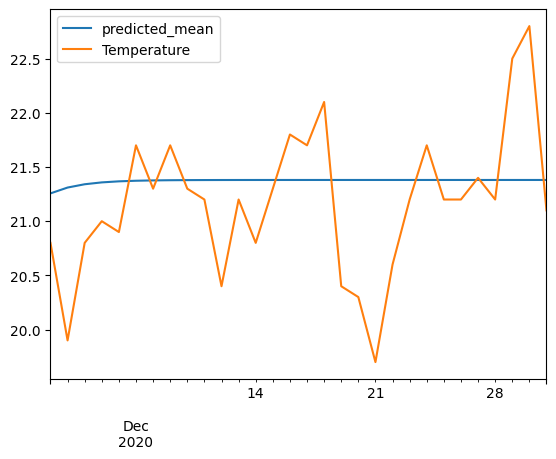

In [164]:
pred.plot(legend = True)
test['Temperature'].plot(legend = True)

In [166]:
test['Temperature'].mean()

21.173333333333336

In [167]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Temperature']))
rmse

0.6919825637815636

In [168]:
model2 = ARIMA(data['Temperature'], order = (1, 1, 2))
model2 = model2.fit()

In [169]:
data.tail()

,Temperature
2020-12-27,21.4
2020-12-28,21.2
2020-12-29,22.5
2020-12-30,22.8
2020-12-31,21.1


In [170]:
index_future_dates = pd.date_range(start = '2020-12-31', end = '2021-01-30')
comp_pred = model2.predict(start = len(data), end = len(data) + 30, type = 'levels').rename('ARIMA Predictions')
comp_pred.index = index_future_dates
comp_pred

2020-12-31    21.307777
2021-01-01    21.359160
2021-01-02    21.388178
2021-01-03    21.404566
2021-01-04    21.413821
2021-01-05    21.419047
2021-01-06    21.421999
2021-01-07    21.423666
2021-01-08    21.424607
2021-01-09    21.425139
2021-01-10    21.425439
2021-01-11    21.425608
2021-01-12    21.425704
2021-01-13    21.425758
2021-01-14    21.425789
2021-01-15    21.425806
2021-01-16    21.425816
2021-01-17    21.425821
2021-01-18    21.425824
2021-01-19    21.425826
2021-01-20    21.425827
2021-01-21    21.425828
2021-01-22    21.425828
2021-01-23    21.425828
2021-01-24    21.425828
2021-01-25    21.425828
2021-01-26    21.425828
2021-01-27    21.425828
2021-01-28    21.425828
2021-01-29    21.425828
2021-01-30    21.425828
Freq: D, Name: ARIMA Predictions, dtype: float64

<Axes: >

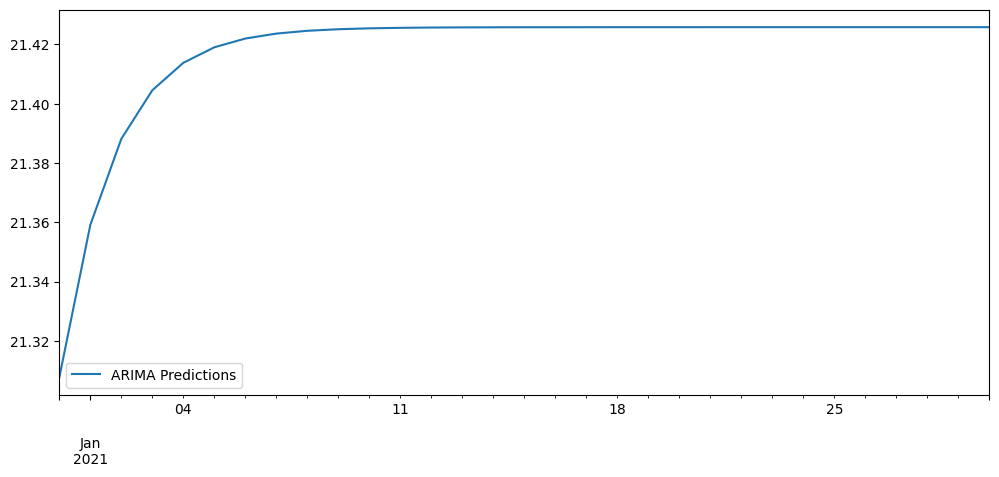

In [171]:
comp_pred.plot(figsize = (12,5), legend = True)

In [172]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]
train.shape, test.shape

((10323, 1), (1000, 1))

In [173]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end)
pred

2018-04-07    27.049184
2018-04-08    26.678323
2018-04-09    26.466317
2018-04-10    26.315667
2018-04-11    26.486506
                ...    
2020-12-27    21.380367
2020-12-28    21.380367
2020-12-29    21.380367
2020-12-30    21.380367
2020-12-31    21.380367
Freq: D, Name: predicted_mean, Length: 1000, dtype: float64

<Axes: >

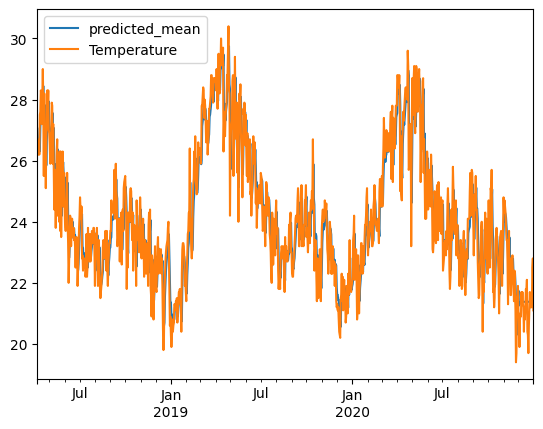

In [174]:
pred.plot(legend = True)
test['Temperature'].plot(legend = True)